In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [1]:
pip install pydotplus

     ------------------------------------- 278.7/278.7 kB 80.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24554 sha256=96ad2becb9d3bb90ec16620d2470f45cb3f4055c3b1cc8d11befe02bcd790dd4
  Stored in directory: c:\users\abc\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Load the dataset
data = pd.read_csv('bank-additional-full.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int32  
 2   marital         41188 non-null  int32  
 3   education       41188 non-null  int32  
 4   default         41188 non-null  int32  
 5   housing         41188 non-null  int32  
 6   loan            41188 non-null  int32  
 7   contact         41188 non-null  int32  
 8   month           41188 non-null  int32  
 9   day_of_week     41188 non-null  int32  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int32  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [27]:
# Drop multiple columns using a list
columns_to_drop = ['marital', 'contact']
data.drop(columns=columns_to_drop, axis=1, inplace=True)

In [28]:
# Detecting duplicates
duplicates = data[data.duplicated()]
duplicates

,age,job,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,1,1,0,0,0,6,2,124,1,999,0,1,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,5,7,0,0,0,3,2,88,1,999,0,1,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,9,5,0,0,0,3,1,331,2,999,0,1,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,9,3,0,2,0,3,2,43,3,999,0,1,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,9,5,0,2,0,3,2,128,1,999,0,1,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,7,3,1,0,0,1,1,33,1,999,0,1,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,9,5,0,2,0,1,3,127,1,999,0,1,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,0,6,0,0,0,7,3,123,2,999,0,1,-0.1,93.200,-42.0,4.153,5195.8,no
25791,43,0,6,0,0,0,7,4,97,1,999,0,1,-0.1,93.200,-42.0,4.120,5195.8,no
28477,24,7,3,0,2,0,0,3,114,1,999,0,1,-1.8,93.075,-47.1,1.423,5099.1,no


In [31]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int32  
 2   education       41188 non-null  int32  
 3   default         41188 non-null  int32  
 4   housing         41188 non-null  int32  
 5   loan            41188 non-null  int32  
 6   month           41188 non-null  int32  
 7   day_of_week     41188 non-null  int32  
 8   duration        41188 non-null  int64  
 9   campaign        41188 non-null  int64  
 10  pdays           41188 non-null  int64  
 11  previous        41188 non-null  int64  
 12  poutcome        41188 non-null  int32  
 13  emp.var.rate    41188 non-null  float64
 14  cons.price.idx  41188 non-null  float64
 15  cons.conf.idx   41188 non-null  float64
 16  euribor3m       41188 non-null  float64
 17  nr.employed     41188 non-null 

<AxesSubplot:>

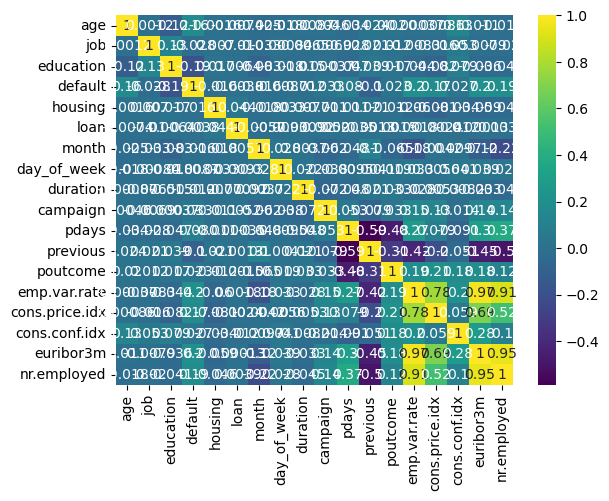

In [32]:
sns.heatmap(data.corr(), cmap='viridis',annot=True)

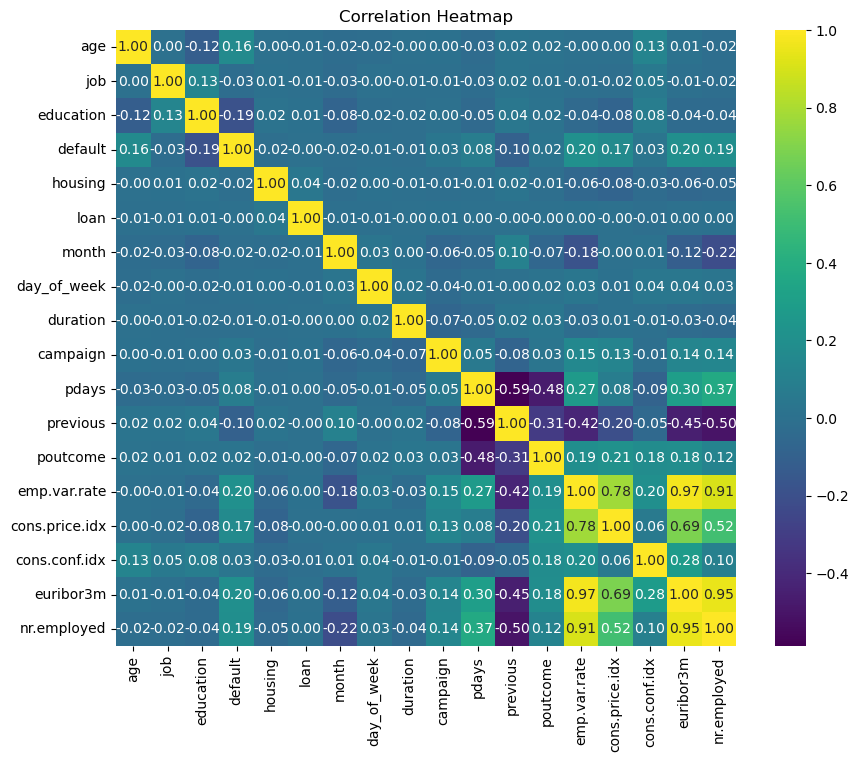

In [33]:
# Increase figure size and font size
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), cmap='viridis', annot=True, fmt='.2f', annot_kws={"size": 10})

plt.title('Correlation Heatmap')
plt.show()

In [35]:
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['job', 'education', 'default', 'housing', 'loan', 'month', 'day_of_week', 'poutcome']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])
    

In [38]:
print(data.columns)

Index(['age', 'job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')


In [40]:
selected_features = ['age', 'job', 'education', 'campaign', 'previous']  # Adjust these columns
X = data['job']
y = data['campaign']

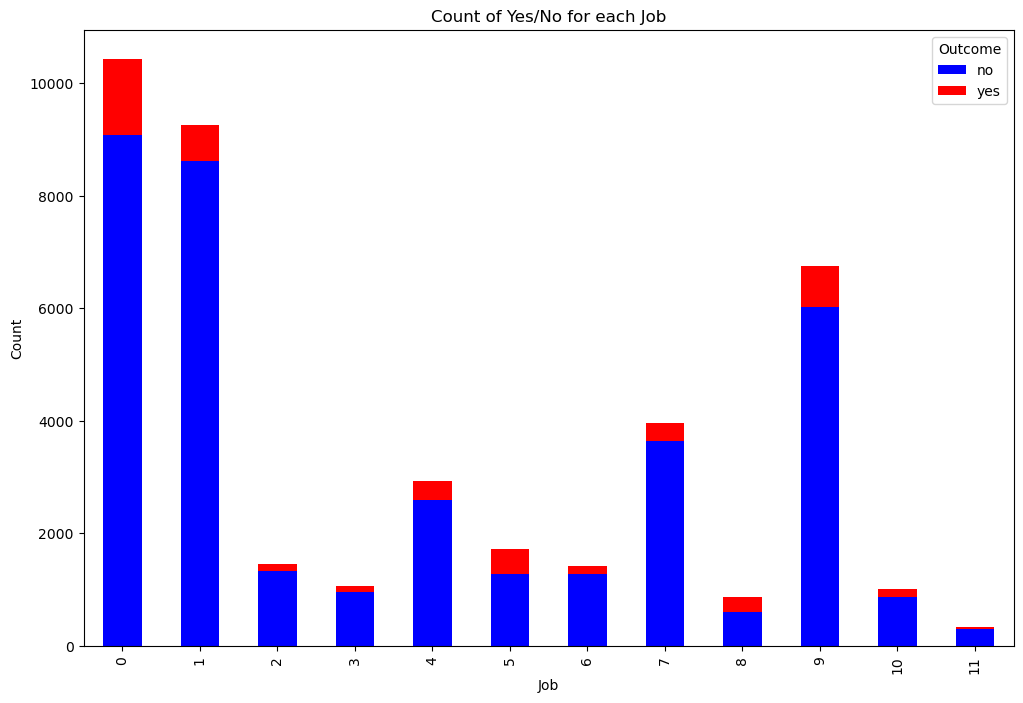

In [42]:
# Define colors for 'yes' and 'no' categories
bar_colors = ['blue', 'red']

# Group the data by 'job' and 'y' and calculate the count of occurrences
grouped = data.groupby(['job', 'y']).size().unstack()

# Plot the grouped bar chart
grouped.plot(kind='bar', stacked=True, color=bar_colors, figsize=(12, 8))
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Count of Yes/No for each Job')
plt.legend(title='Outcome')
plt.show()

In [43]:
# Split the data into features and target
X = data.drop('y', axis=1)
y = data['y']


In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Create a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

In [47]:
# Train the classifier
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [48]:
# Predict on the test set
y_pred = decision_tree.predict(X_test)


In [49]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [50]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.888443797038116
Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.93      0.94      7303
         yes       0.51      0.54      0.52       935

    accuracy                           0.89      8238
   macro avg       0.72      0.74      0.73      8238
weighted avg       0.89      0.89      0.89      8238



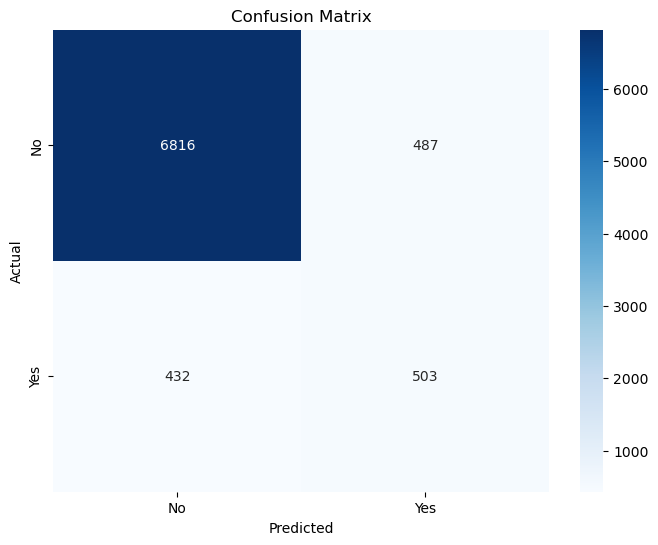

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [58]:


# Select features and target variable
X = data['job']  # Use multiple features
y = data['y']  # Target variable to predict

In [60]:
# Assuming 'job' is a single feature among others
X = data['job'].values.reshape(-1, 1)  # Reshape for a single feature
y = data['y']  # Target variable

# Create and fit the decision tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X, y)

DecisionTreeClassifier(random_state=42)

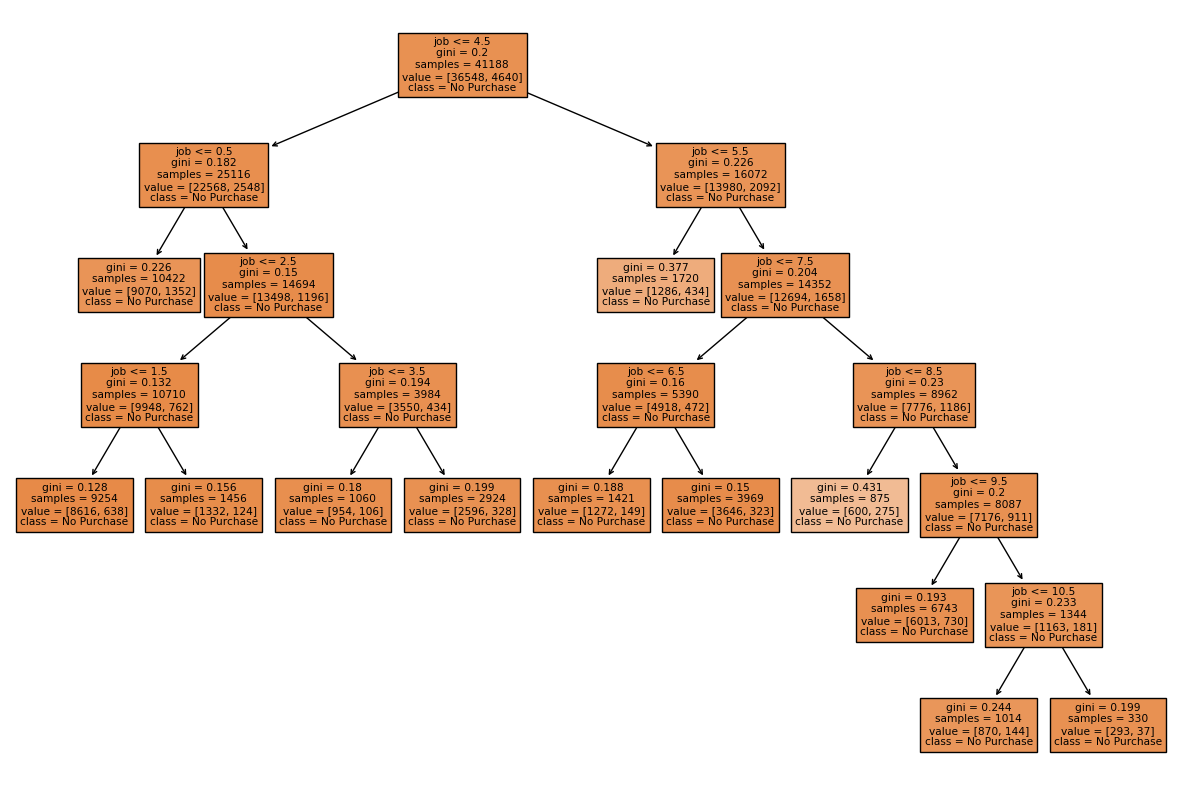

In [61]:
# Visualizing the decision tree
plt.figure(figsize=(15, 10))  # Set the figure size
plot_tree(decision_tree, feature_names=['job'], class_names=['No Purchase', 'Purchase'], filled=True)
plt.show()